In [56]:
import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings(action='ignore')

In [91]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

In [113]:
df = pd.read_csv('data/crime_in_Seoul.csv', encoding='euc-kr',thousands = ',')
df.head(5)

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


In [115]:
sb=df.sort_values(by="살인 발생",ascending=False)
sb

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
9,영등포서,14,12,22,20,295,183,2964,978,3572,2961
16,중랑서,13,12,11,9,187,148,2135,829,2847,2407
25,송파서,11,10,13,10,220,178,3239,1129,3295,2786
30,수서서,10,7,6,6,149,124,1439,666,1819,1559
26,노원서,10,10,7,7,197,121,2193,801,2723,2329
18,관악서,9,8,12,14,320,221,2706,827,3298,2642
22,구로서,8,6,15,11,281,164,2335,889,3007,2432
8,마포서,8,8,14,10,294,247,2555,813,2983,2519
23,서초서,7,4,8,5,334,193,1982,905,1852,1607
14,강북서,7,8,14,13,153,126,1434,618,2649,2348


In [71]:
sb=df.sort_values(by="살인 발생",ascending=False)
print('관서명:', sb.iloc[0]['관서명'])
print('살인 발생:', sb.iloc[0]['살인 발생'])
print('살인 검거:', sb.iloc[0]['살인 검거'])

관서명: 영등포서
살인 발생: 14
살인 검거: 12


In [72]:
df['관서명']

0      중부서
1      종로서
2     남대문서
3     서대문서
4      혜화서
5      용산서
6      성북서
7     동대문서
8      마포서
9     영등포서
10     성동서
11     동작서
12     광진서
13     서부서
14     강북서
15     금천서
16     중랑서
17     강남서
18     관악서
19     강서서
20     강동서
21     종암서
22     구로서
23     서초서
24     양천서
25     송파서
26     노원서
27     방배서
28     은평서
29     도봉서
30     수서서
Name: 관서명, dtype: object

In [73]:
df.dtypes

관서명      object
살인 발생     int64
살인 검거     int64
강도 발생     int64
강도 검거     int64
강간 발생     int64
강간 검거     int64
절도 발생     int64
절도 검거     int64
폭력 발생     int64
폭력 검거     int64
dtype: object

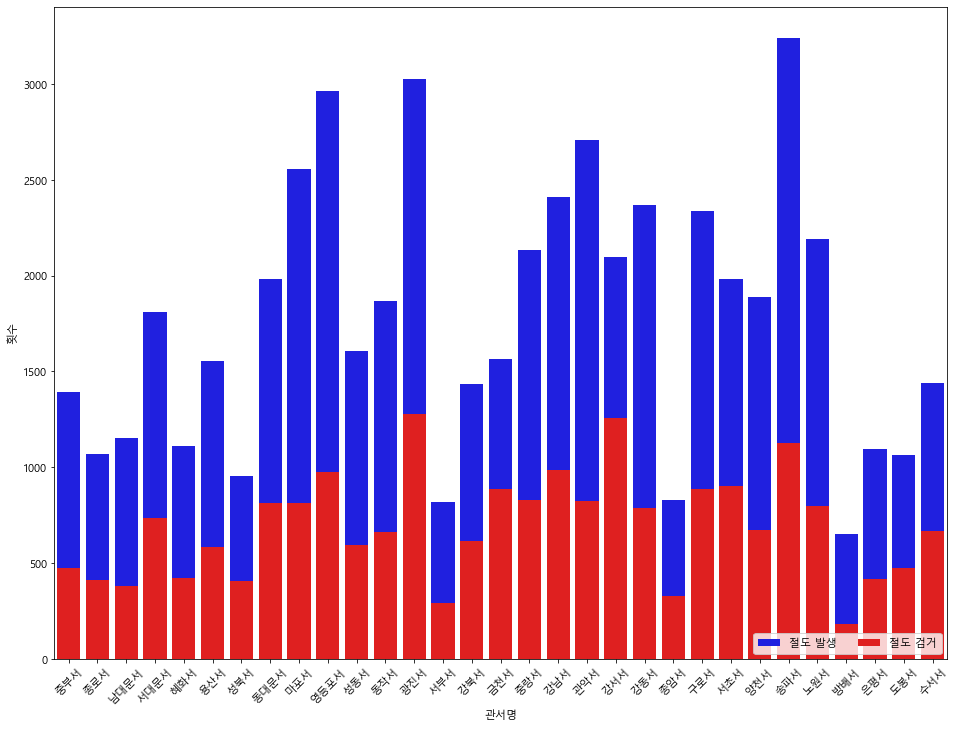

In [92]:
plt.figure(figsize=(16,12))
sns.barplot(x='관서명', y='절도 발생', data=df,
            label='절도 발생', color='b')
sns.barplot(x='관서명', y='절도 검거', data=df,
            label='절도 검거', color='r')
plt.legend(ncol=2, loc="lower right", frameon=True)
plt.xticks(rotation=45)
plt.ylabel('횟수')
plt.show()

In [81]:
df.loc[:,'절도검거율']=df['절도 검거']/df['절도 발생']
df.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,절도검거율
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,0.341935
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,0.385981
2,남대문서,1,0,6,4,65,46,1153,382,869,794,0.331310
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,0.407285
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,0.380610


In [88]:
pb=df.sort_values(by="폭력 발생",ascending=False)
pb.iloc[:5]
pb.iloc[:5][['관서명','폭력 발생','폭력 검거']]

,관서명,폭력 발생,폭력 검거
9,영등포서,3572,2961
18,관악서,3298,2642
25,송파서,3295,2786
19,강서서,3207,2718
22,구로서,3007,2432


In [89]:
df.corr()

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,절도검거율
살인 발생,1.000000,0.953920,0.640281,0.486899,0.621728,0.572858,0.662590,0.575135,0.754575,0.755763,-0.019993
살인 검거,0.953920,1.000000,0.648964,0.505346,0.575409,0.571278,0.653474,0.587725,0.802798,0.807260,0.014842
강도 발생,0.640281,0.648964,1.000000,0.866390,0.745120,0.798568,0.744599,0.702067,0.793311,0.801213,0.043121
강도 검거,0.486899,0.505346,0.866390,1.000000,0.604698,0.744171,0.710847,0.718638,0.696732,0.699700,0.115837
강간 발생,0.621728,0.575409,0.745120,0.604698,1.000000,0.915617,0.807301,0.781462,0.762625,0.756427,0.071175
강간 검거,0.572858,0.571278,0.798568,0.744171,0.915617,1.000000,0.838196,0.831827,0.800653,0.800535,0.120781
절도 발생,0.662590,0.653474,0.744599,0.710847,0.807301,0.838196,1.000000,0.888714,0.897244,0.889385,-0.084518
절도 검거,0.575135,0.587725,0.702067,0.718638,0.781462,0.831827,0.888714,1.000000,0.846821,0.852488,0.363117
폭력 발생,0.754575,0.802798,0.793311,0.696732,0.762625,0.800653,0.897244,0.846821,1.000000,0.997356,0.071899
폭력 검거,0.755763,0.807260,0.801213,0.699700,0.756427,0.800535,0.889385,0.852488,0.997356,1.000000,0.099122


<AxesSubplot:>

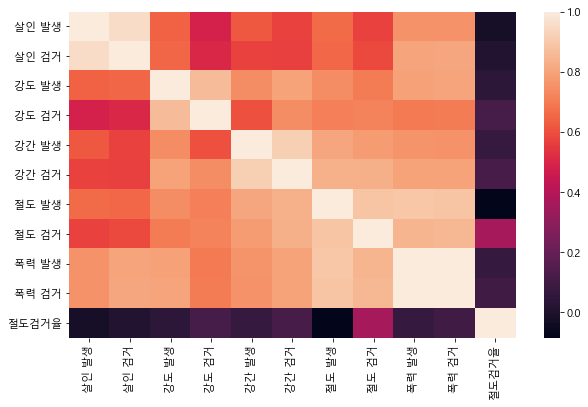

In [93]:
sns.heatmap(df.corr())

In [118]:
x_data=df['살인 발생'].values
x_data

array([ 2,  3,  1,  2,  3,  5,  2,  5,  8, 14,  4,  5,  4,  2,  7,  3, 13,
        3,  9,  7,  4,  3,  8,  7,  3, 11, 10,  1,  1,  3, 10],
      dtype=int64)

In [119]:
type(x_data)

numpy.ndarray

In [117]:
y_data=df['폭력 발생'].values
y_data

array([1355, 1278,  869, 2056, 1015, 2050, 1194, 2548, 2983, 3572, 1612,
       1910, 2625, 1192, 2649, 2054, 2847, 2465, 3298, 3207, 2712, 1015,
       3007, 1852, 2509, 3295, 2723,  547, 1461, 1487, 1819], dtype=int64)

In [120]:
type(y_data)

numpy.ndarray

In [129]:
x=tf.constant(x_data, tf.float32)
y=tf.constant(y_data, tf.float32)

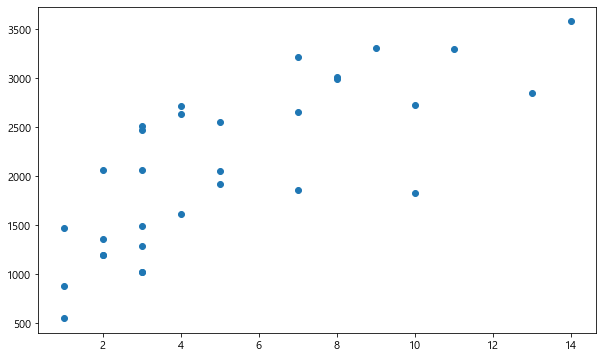

In [130]:
plt.scatter(x_data,y_data)
plt.show()

In [131]:
w=tf.Variable(tf.random.uniform([1]))
b=tf.Variable(tf.random.uniform([1]))

In [123]:
def compute_cost():
    hx=w*x+b
    cost=tf.reduce_mean((hx-y)**2)
    return cost

In [145]:
optimizer=Adam(learning_rate=0.1)
hist_cost=[]
for i in range(5000):
    optimizer.minimize(compute_cost, var_list=[w,b])
    c=compute_cost().numpy()
    hist_cost.append(c)
    print(i, 'cost=',c)

0 cost= 1162462.2
1 cost= 1161323.1
2 cost= 1160184.9
3 cost= 1159048.0
4 cost= 1157912.0
5 cost= 1156777.0
6 cost= 1155643.4
7 cost= 1154510.9
8 cost= 1153379.6
9 cost= 1152249.4
10 cost= 1151120.5
11 cost= 1149992.8
12 cost= 1148866.5
13 cost= 1147741.1
14 cost= 1146617.2
15 cost= 1145494.8
16 cost= 1144373.2
17 cost= 1143253.2
18 cost= 1142134.6
19 cost= 1141017.2
20 cost= 1139901.1
21 cost= 1138786.8
22 cost= 1137673.4
23 cost= 1136561.4
24 cost= 1135451.0
25 cost= 1134341.6
26 cost= 1133234.1
27 cost= 1132127.6
28 cost= 1131022.9
29 cost= 1129919.2
30 cost= 1128817.2
31 cost= 1127716.5
32 cost= 1126617.2
33 cost= 1125519.6
34 cost= 1124423.4
35 cost= 1123328.5
36 cost= 1122235.2
37 cost= 1121143.4
38 cost= 1120052.9
39 cost= 1118963.9
40 cost= 1117876.2
41 cost= 1116790.4
42 cost= 1115705.8
43 cost= 1114622.8
44 cost= 1113541.1
45 cost= 1112461.0
46 cost= 1111382.5
47 cost= 1110305.1
48 cost= 1109229.5
49 cost= 1108155.4
50 cost= 1107082.6
51 cost= 1106011.5
52 cost= 1104941.8
53 

455 cost= 781748.25
456 cost= 781179.7
457 cost= 780612.06
458 cost= 780045.56
459 cost= 779480.0
460 cost= 778915.4
461 cost= 778351.75
462 cost= 777789.2
463 cost= 777227.44
464 cost= 776666.75
465 cost= 776107.1
466 cost= 775548.3
467 cost= 774990.6
468 cost= 774433.9
469 cost= 773878.0
470 cost= 773323.4
471 cost= 772769.5
472 cost= 772216.6
473 cost= 771664.75
474 cost= 771113.8
475 cost= 770563.94
476 cost= 770014.9
477 cost= 769467.06
478 cost= 768919.94
479 cost= 768373.8
480 cost= 767828.75
481 cost= 767284.56
482 cost= 766741.44
483 cost= 766199.2
484 cost= 765657.94
485 cost= 765117.56
486 cost= 764578.25
487 cost= 764039.9
488 cost= 763502.44
489 cost= 762966.0
490 cost= 762430.4
491 cost= 761895.9
492 cost= 761362.2
493 cost= 760829.56
494 cost= 760297.6
495 cost= 759766.94
496 cost= 759237.06
497 cost= 758708.1
498 cost= 758180.1
499 cost= 757653.2
500 cost= 757127.1
501 cost= 756602.0
502 cost= 756077.75
503 cost= 755554.5
504 cost= 755032.1
505 cost= 754510.8
506 cost= 

929 cost= 603602.56
930 cost= 603380.8
931 cost= 603159.6
932 cost= 602938.9
933 cost= 602718.6
934 cost= 602498.9
935 cost= 602279.6
936 cost= 602060.9
937 cost= 601842.56
938 cost= 601624.8
939 cost= 601407.56
940 cost= 601190.75
941 cost= 600974.44
942 cost= 600758.56
943 cost= 600543.25
944 cost= 600328.3
945 cost= 600113.94
946 cost= 599900.06
947 cost= 599686.56
948 cost= 599473.7
949 cost= 599261.2
950 cost= 599049.1
951 cost= 598837.7
952 cost= 598626.56
953 cost= 598416.06
954 cost= 598205.9
955 cost= 597996.25
956 cost= 597787.06
957 cost= 597578.4
958 cost= 597370.25
959 cost= 597162.5
960 cost= 596955.2
961 cost= 596748.3
962 cost= 596542.0
963 cost= 596336.1
964 cost= 596130.75
965 cost= 595925.8
966 cost= 595721.3
967 cost= 595517.3
968 cost= 595313.75
969 cost= 595110.56
970 cost= 594908.0
971 cost= 594705.8
972 cost= 594504.0
973 cost= 594302.7
974 cost= 594101.94
975 cost= 593901.7
976 cost= 593701.7
977 cost= 593502.2
978 cost= 593303.2
979 cost= 593104.6
980 cost= 59

1340 cost= 544733.2
1341 cost= 544648.2
1342 cost= 544563.5
1343 cost= 544478.94
1344 cost= 544394.6
1345 cost= 544310.44
1346 cost= 544226.5
1347 cost= 544142.75
1348 cost= 544059.25
1349 cost= 543975.9
1350 cost= 543892.7
1351 cost= 543809.8
1352 cost= 543726.94
1353 cost= 543644.4
1354 cost= 543561.94
1355 cost= 543479.75
1356 cost= 543397.75
1357 cost= 543315.9
1358 cost= 543234.25
1359 cost= 543152.75
1360 cost= 543071.5
1361 cost= 542990.3
1362 cost= 542909.5
1363 cost= 542828.6
1364 cost= 542748.2
1365 cost= 542667.9
1366 cost= 542587.6
1367 cost= 542507.6
1368 cost= 542427.8
1369 cost= 542348.2
1370 cost= 542268.75
1371 cost= 542189.44
1372 cost= 542110.3
1373 cost= 542031.44
1374 cost= 541952.6
1375 cost= 541874.1
1376 cost= 541795.75
1377 cost= 541717.56
1378 cost= 541639.56
1379 cost= 541561.75
1380 cost= 541484.0
1381 cost= 541406.5
1382 cost= 541329.25
1383 cost= 541252.06
1384 cost= 541175.1
1385 cost= 541098.3
1386 cost= 541021.7
1387 cost= 540945.25
1388 cost= 540868.9


1759 cost= 520821.22
1760 cost= 520781.56
1761 cost= 520742.03
1762 cost= 520702.4
1763 cost= 520662.9
1764 cost= 520623.47
1765 cost= 520584.06
1766 cost= 520544.66
1767 cost= 520505.28
1768 cost= 520466.06
1769 cost= 520426.72
1770 cost= 520387.56
1771 cost= 520348.3
1772 cost= 520309.2
1773 cost= 520270.12
1774 cost= 520231.06
1775 cost= 520192.03
1776 cost= 520153.1
1777 cost= 520114.1
1778 cost= 520075.25
1779 cost= 520036.38
1780 cost= 519997.62
1781 cost= 519958.84
1782 cost= 519920.12
1783 cost= 519881.44
1784 cost= 519842.8
1785 cost= 519804.1
1786 cost= 519765.56
1787 cost= 519727.03
1788 cost= 519688.56
1789 cost= 519650.06
1790 cost= 519611.66
1791 cost= 519573.28
1792 cost= 519534.94
1793 cost= 519496.7
1794 cost= 519458.38
1795 cost= 519420.16
1796 cost= 519382.06
1797 cost= 519343.88
1798 cost= 519305.8
1799 cost= 519267.72
1800 cost= 519229.7
1801 cost= 519191.66
1802 cost= 519153.7
1803 cost= 519115.8
1804 cost= 519077.88
1805 cost= 519040.03
1806 cost= 519002.2
1807 c

2195 cost= 505722.94
2196 cost= 505690.28
2197 cost= 505657.47
2198 cost= 505624.84
2199 cost= 505592.2
2200 cost= 505559.4
2201 cost= 505526.72
2202 cost= 505494.0
2203 cost= 505461.3
2204 cost= 505428.62
2205 cost= 505395.9
2206 cost= 505363.2
2207 cost= 505330.44
2208 cost= 505297.8
2209 cost= 505265.0
2210 cost= 505232.3
2211 cost= 505199.62
2212 cost= 505166.94
2213 cost= 505134.2
2214 cost= 505101.47
2215 cost= 505068.75
2216 cost= 505036.0
2217 cost= 505003.3
2218 cost= 504970.66
2219 cost= 504937.94
2220 cost= 504905.16
2221 cost= 504872.44
2222 cost= 504839.78
2223 cost= 504806.97
2224 cost= 504774.3
2225 cost= 504741.56
2226 cost= 504708.8
2227 cost= 504676.16
2228 cost= 504643.4
2229 cost= 504610.7
2230 cost= 504577.94
2231 cost= 504545.2
2232 cost= 504512.47
2233 cost= 504479.72
2234 cost= 504446.97
2235 cost= 504414.28
2236 cost= 504381.56
2237 cost= 504348.8
2238 cost= 504316.03
2239 cost= 504283.3
2240 cost= 504250.56
2241 cost= 504217.75
2242 cost= 504185.1
2243 cost= 5

2644 cost= 490746.38
2645 cost= 490712.1
2646 cost= 490677.8
2647 cost= 490643.56
2648 cost= 490609.28
2649 cost= 490574.97
2650 cost= 490540.7
2651 cost= 490506.3
2652 cost= 490472.03
2653 cost= 490437.7
2654 cost= 490403.38
2655 cost= 490369.03
2656 cost= 490334.75
2657 cost= 490300.4
2658 cost= 490266.03
2659 cost= 490231.7
2660 cost= 490197.38
2661 cost= 490163.0
2662 cost= 490128.62
2663 cost= 490094.28
2664 cost= 490059.94
2665 cost= 490025.6
2666 cost= 489991.16
2667 cost= 489956.78
2668 cost= 489922.38
2669 cost= 489888.03
2670 cost= 489853.7
2671 cost= 489819.28
2672 cost= 489784.84
2673 cost= 489750.38
2674 cost= 489716.0
2675 cost= 489681.62
2676 cost= 489647.16
2677 cost= 489612.84
2678 cost= 489578.3
2679 cost= 489543.94
2680 cost= 489509.47
2681 cost= 489475.03
2682 cost= 489440.66
2683 cost= 489406.2
2684 cost= 489371.75
2685 cost= 489337.25
2686 cost= 489302.78
2687 cost= 489268.3
2688 cost= 489233.84
2689 cost= 489199.34
2690 cost= 489164.94
2691 cost= 489130.38
2692 c

3081 cost= 475405.62
3082 cost= 475369.78
3083 cost= 475333.97
3084 cost= 475298.25
3085 cost= 475262.4
3086 cost= 475226.66
3087 cost= 475190.88
3088 cost= 475155.03
3089 cost= 475119.22
3090 cost= 475083.44
3091 cost= 475047.66
3092 cost= 475011.9
3093 cost= 474976.03
3094 cost= 474940.25
3095 cost= 474904.44
3096 cost= 474868.62
3097 cost= 474832.78
3098 cost= 474797.03
3099 cost= 474761.12
3100 cost= 474725.3
3101 cost= 474689.56
3102 cost= 474653.72
3103 cost= 474617.88
3104 cost= 474582.06
3105 cost= 474546.22
3106 cost= 474510.34
3107 cost= 474474.56
3108 cost= 474438.7
3109 cost= 474402.88
3110 cost= 474367.0
3111 cost= 474331.12
3112 cost= 474295.34
3113 cost= 474259.47
3114 cost= 474223.62
3115 cost= 474187.8
3116 cost= 474151.94
3117 cost= 474116.03
3118 cost= 474080.2
3119 cost= 474044.3
3120 cost= 474008.47
3121 cost= 473972.6
3122 cost= 473936.72
3123 cost= 473900.84
3124 cost= 473864.97
3125 cost= 473829.03
3126 cost= 473793.22
3127 cost= 473757.3
3128 cost= 473721.47
31

3481 cost= 460960.4
3482 cost= 460924.16
3483 cost= 460887.88
3484 cost= 460851.47
3485 cost= 460815.16
3486 cost= 460778.9
3487 cost= 460742.53
3488 cost= 460706.25
3489 cost= 460669.94
3490 cost= 460633.6
3491 cost= 460597.28
3492 cost= 460560.97
3493 cost= 460524.7
3494 cost= 460488.34
3495 cost= 460452.0
3496 cost= 460415.72
3497 cost= 460379.38
3498 cost= 460343.0
3499 cost= 460306.75
3500 cost= 460270.34
3501 cost= 460234.12
3502 cost= 460197.8
3503 cost= 460161.47
3504 cost= 460125.1
3505 cost= 460088.78
3506 cost= 460052.44
3507 cost= 460016.12
3508 cost= 459979.78
3509 cost= 459943.53
3510 cost= 459907.22
3511 cost= 459870.84
3512 cost= 459834.56
3513 cost= 459798.16
3514 cost= 459761.88
3515 cost= 459725.6
3516 cost= 459689.22
3517 cost= 459652.88
3518 cost= 459616.6
3519 cost= 459580.25
3520 cost= 459543.97
3521 cost= 459507.62
3522 cost= 459471.28
3523 cost= 459434.97
3524 cost= 459398.66
3525 cost= 459362.22
3526 cost= 459326.0
3527 cost= 459289.62
3528 cost= 459253.3
3529

3889 cost= 446160.56
3890 cost= 446124.44
3891 cost= 446088.3
3892 cost= 446052.2
3893 cost= 446016.06
3894 cost= 445980.0
3895 cost= 445943.88
3896 cost= 445907.75
3897 cost= 445871.62
3898 cost= 445835.56
3899 cost= 445799.47
3900 cost= 445763.34
3901 cost= 445727.16
3902 cost= 445691.1
3903 cost= 445655.0
3904 cost= 445618.9
3905 cost= 445582.84
3906 cost= 445546.72
3907 cost= 445510.62
3908 cost= 445474.53
3909 cost= 445438.38
3910 cost= 445402.28
3911 cost= 445366.2
3912 cost= 445330.16
3913 cost= 445294.06
3914 cost= 445257.97
3915 cost= 445221.9
3916 cost= 445185.84
3917 cost= 445149.75
3918 cost= 445113.62
3919 cost= 445077.56
3920 cost= 445041.47
3921 cost= 445005.4
3922 cost= 444969.34
3923 cost= 444933.25
3924 cost= 444897.16
3925 cost= 444861.1
3926 cost= 444825.06
3927 cost= 444788.97
3928 cost= 444752.9
3929 cost= 444716.84
3930 cost= 444680.72
3931 cost= 444644.72
3932 cost= 444608.66
3933 cost= 444572.6
3934 cost= 444536.53
3935 cost= 444500.44
3936 cost= 444464.44
3937

4301 cost= 431427.25
4302 cost= 431391.9
4303 cost= 431356.66
4304 cost= 431321.3
4305 cost= 431286.06
4306 cost= 431250.72
4307 cost= 431215.44
4308 cost= 431180.12
4309 cost= 431144.88
4310 cost= 431109.53
4311 cost= 431074.3
4312 cost= 431038.97
4313 cost= 431003.75
4314 cost= 430968.38
4315 cost= 430933.16
4316 cost= 430897.88
4317 cost= 430862.6
4318 cost= 430827.34
4319 cost= 430792.12
4320 cost= 430756.78
4321 cost= 430721.56
4322 cost= 430686.25
4323 cost= 430651.1
4324 cost= 430615.8
4325 cost= 430580.6
4326 cost= 430545.28
4327 cost= 430510.06
4328 cost= 430474.8
4329 cost= 430439.62
4330 cost= 430404.34
4331 cost= 430369.16
4332 cost= 430333.84
4333 cost= 430298.66
4334 cost= 430263.4
4335 cost= 430228.2
4336 cost= 430192.94
4337 cost= 430157.75
4338 cost= 430122.53
4339 cost= 430087.28
4340 cost= 430052.1
4341 cost= 430016.9
4342 cost= 429981.7
4343 cost= 429946.53
4344 cost= 429911.3
4345 cost= 429876.12
4346 cost= 429840.9
4347 cost= 429805.7
4348 cost= 429770.47
4349 cos

4724 cost= 416750.8
4725 cost= 416716.78
4726 cost= 416682.84
4727 cost= 416648.8
4728 cost= 416614.78
4729 cost= 416580.84
4730 cost= 416546.84
4731 cost= 416512.8
4732 cost= 416478.84
4733 cost= 416444.88
4734 cost= 416410.9
4735 cost= 416376.97
4736 cost= 416342.9
4737 cost= 416308.97
4738 cost= 416275.03
4739 cost= 416241.1
4740 cost= 416207.1
4741 cost= 416173.16
4742 cost= 416139.22
4743 cost= 416105.28
4744 cost= 416071.34
4745 cost= 416037.4
4746 cost= 416003.44
4747 cost= 415969.53
4748 cost= 415935.56
4749 cost= 415901.7
4750 cost= 415867.7
4751 cost= 415833.8
4752 cost= 415799.88
4753 cost= 415765.94
4754 cost= 415732.06
4755 cost= 415698.12
4756 cost= 415664.2
4757 cost= 415630.38
4758 cost= 415596.44
4759 cost= 415562.56
4760 cost= 415528.66
4761 cost= 415494.78
4762 cost= 415460.9
4763 cost= 415427.03
4764 cost= 415393.12
4765 cost= 415359.3
4766 cost= 415325.44
4767 cost= 415291.62
4768 cost= 415257.75
4769 cost= 415223.88
4770 cost= 415190.06
4771 cost= 415156.25
4772 c

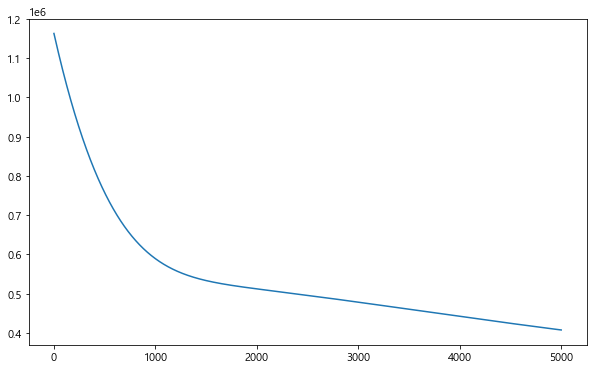

In [146]:
plt.plot(hist_cost)
plt.show()

In [147]:
def hxFn(xdata):
    xd=tf.constant(xdata)
    hx=w*xdata + b
    return hx.numpy()

In [148]:
hxFn(5)

array([1847.5459], dtype=float32)

In [ ]:
# 케라스

In [149]:
dense=Dense(units=1, input_dim=1) #w,b 초기값...
model=Sequential([dense])
model.compile(loss='mse', optimizer=Adam(0.1))
h=model.fit(x_data, y_data, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 192ms/step - loss: 5091540.5000
Epoch 2/5000
1/1 [==============================] - 0s 3ms/step - loss: 5088470.5000
Epoch 3/5000
1/1 [==============================] - 0s 4ms/step - loss: 5085403.5000
Epoch 4/5000
1/1 [==============================] - 0s 3ms/step - loss: 5082335.5000
Epoch 5/5000
1/1 [==============================] - 0s 2ms/step - loss: 5079269.0000
Epoch 6/5000
1/1 [==============================] - 0s 5ms/step - loss: 5076204.5000
Epoch 7/5000
1/1 [==============================] - 0s 3ms/step - loss: 5073140.5000
Epoch 8/5000
1/1 [==============================] - 0s 3ms/step - loss: 5070077.5000
Epoch 9/5000
1/1 [==============================] - 0s 5ms/step - loss: 5067016.5000
Epoch 10/5000
1/1 [==============================] - 0s 3ms/step - loss: 5063955.5000
Epoch 11/5000
1/1 [==============================] - 0s 4ms/step - loss: 5060896.5000
Epoch 12/5000
1/1 [==============================] - 0s 3ms/s

1/1 [==============================] - 0s 3ms/step - loss: 4806086.0000
Epoch 97/5000
1/1 [==============================] - 0s 3ms/step - loss: 4803152.0000
Epoch 98/5000
1/1 [==============================] - 0s 3ms/step - loss: 4800220.5000
Epoch 99/5000
1/1 [==============================] - 0s 4ms/step - loss: 4797290.5000
Epoch 100/5000
1/1 [==============================] - 0s 3ms/step - loss: 4794362.0000
Epoch 101/5000
1/1 [==============================] - 0s 4ms/step - loss: 4791434.5000
Epoch 102/5000
1/1 [==============================] - 0s 3ms/step - loss: 4788509.0000
Epoch 103/5000
1/1 [==============================] - 0s 3ms/step - loss: 4785584.0000
Epoch 104/5000
1/1 [==============================] - 0s 4ms/step - loss: 4782661.5000
Epoch 105/5000
1/1 [==============================] - 0s 3ms/step - loss: 4779740.0000
Epoch 106/5000
1/1 [==============================] - 0s 3ms/step - loss: 4776820.5000
Epoch 107/5000
1/1 [==============================] - 0s 3ms/

1/1 [==============================] - 0s 3ms/step - loss: 4536845.5000
Epoch 191/5000
1/1 [==============================] - 0s 3ms/step - loss: 4534051.0000
Epoch 192/5000
1/1 [==============================] - 0s 3ms/step - loss: 4531258.0000
Epoch 193/5000
1/1 [==============================] - 0s 4ms/step - loss: 4528466.0000
Epoch 194/5000
1/1 [==============================] - 0s 5ms/step - loss: 4525676.0000
Epoch 195/5000
1/1 [==============================] - 0s 4ms/step - loss: 4522887.0000
Epoch 196/5000
1/1 [==============================] - 0s 3ms/step - loss: 4520099.5000
Epoch 197/5000
1/1 [==============================] - 0s 4ms/step - loss: 4517314.0000
Epoch 198/5000
1/1 [==============================] - 0s 5ms/step - loss: 4514529.5000
Epoch 199/5000
1/1 [==============================] - 0s 3ms/step - loss: 4511746.5000
Epoch 200/5000
1/1 [==============================] - 0s 7ms/step - loss: 4508964.5000
Epoch 201/5000
1/1 [==============================] - 0s 3

1/1 [==============================] - 0s 4ms/step - loss: 4280411.5000
Epoch 285/5000
1/1 [==============================] - 0s 3ms/step - loss: 4277750.5000
Epoch 286/5000
1/1 [==============================] - 0s 3ms/step - loss: 4275091.0000
Epoch 287/5000
1/1 [==============================] - 0s 3ms/step - loss: 4272433.5000
Epoch 288/5000
1/1 [==============================] - 0s 3ms/step - loss: 4269776.5000
Epoch 289/5000
1/1 [==============================] - 0s 5ms/step - loss: 4267121.5000
Epoch 290/5000
1/1 [==============================] - 0s 5ms/step - loss: 4264467.5000
Epoch 291/5000
1/1 [==============================] - 0s 3ms/step - loss: 4261815.0000
Epoch 292/5000
1/1 [==============================] - 0s 4ms/step - loss: 4259164.0000
Epoch 293/5000
1/1 [==============================] - 0s 4ms/step - loss: 4256514.5000
Epoch 294/5000
1/1 [==============================] - 0s 4ms/step - loss: 4253866.0000
Epoch 295/5000
1/1 [==============================] - 0s 3

1/1 [==============================] - 0s 4ms/step - loss: 4036323.7500
Epoch 379/5000
1/1 [==============================] - 0s 3ms/step - loss: 4033792.0000
Epoch 380/5000
1/1 [==============================] - 0s 4ms/step - loss: 4031261.5000
Epoch 381/5000
1/1 [==============================] - 0s 3ms/step - loss: 4028732.5000
Epoch 382/5000
1/1 [==============================] - 0s 3ms/step - loss: 4026204.5000
Epoch 383/5000
1/1 [==============================] - 0s 3ms/step - loss: 4023678.0000
Epoch 384/5000
1/1 [==============================] - 0s 4ms/step - loss: 4021152.7500
Epoch 385/5000
1/1 [==============================] - 0s 3ms/step - loss: 4018629.0000
Epoch 386/5000
1/1 [==============================] - 0s 3ms/step - loss: 4016106.5000
Epoch 387/5000
1/1 [==============================] - 0s 3ms/step - loss: 4013585.2500
Epoch 388/5000
1/1 [==============================] - 0s 4ms/step - loss: 4011065.5000
Epoch 389/5000
1/1 [==============================] - 0s 3

1/1 [==============================] - 0s 3ms/step - loss: 3804141.2500
Epoch 473/5000
1/1 [==============================] - 0s 3ms/step - loss: 3801733.5000
Epoch 474/5000
1/1 [==============================] - 0s 3ms/step - loss: 3799327.2500
Epoch 475/5000
1/1 [==============================] - 0s 3ms/step - loss: 3796922.2500
Epoch 476/5000
1/1 [==============================] - 0s 3ms/step - loss: 3794518.5000
Epoch 477/5000
1/1 [==============================] - 0s 3ms/step - loss: 3792116.2500
Epoch 478/5000
1/1 [==============================] - 0s 3ms/step - loss: 3789715.0000
Epoch 479/5000
1/1 [==============================] - 0s 3ms/step - loss: 3787315.0000
Epoch 480/5000
1/1 [==============================] - 0s 2ms/step - loss: 3784916.7500
Epoch 481/5000
1/1 [==============================] - 0s 4ms/step - loss: 3782519.5000
Epoch 482/5000
1/1 [==============================] - 0s 3ms/step - loss: 3780123.5000
Epoch 483/5000
1/1 [==============================] - 0s 4

1/1 [==============================] - 0s 3ms/step - loss: 3583438.2500
Epoch 567/5000
1/1 [==============================] - 0s 3ms/step - loss: 3581150.2500
Epoch 568/5000
1/1 [==============================] - 0s 3ms/step - loss: 3578864.0000
Epoch 569/5000
1/1 [==============================] - 0s 4ms/step - loss: 3576578.7500
Epoch 570/5000
1/1 [==============================] - 0s 3ms/step - loss: 3574294.7500
Epoch 571/5000
1/1 [==============================] - 0s 3ms/step - loss: 3572012.2500
Epoch 572/5000
1/1 [==============================] - 0s 4ms/step - loss: 3569730.7500
Epoch 573/5000
1/1 [==============================] - 0s 3ms/step - loss: 3567450.7500
Epoch 574/5000
1/1 [==============================] - 0s 2ms/step - loss: 3565171.5000
Epoch 575/5000
1/1 [==============================] - 0s 3ms/step - loss: 3562894.2500
Epoch 576/5000
1/1 [==============================] - 0s 5ms/step - loss: 3560617.5000
Epoch 577/5000
1/1 [==============================] - 0s 3

1/1 [==============================] - 0s 4ms/step - loss: 3373806.0000
Epoch 661/5000
1/1 [==============================] - 0s 3ms/step - loss: 3371633.7500
Epoch 662/5000
1/1 [==============================] - 0s 2ms/step - loss: 3369463.2500
Epoch 663/5000
1/1 [==============================] - 0s 3ms/step - loss: 3367293.7500
Epoch 664/5000
1/1 [==============================] - 0s 3ms/step - loss: 3365125.2500
Epoch 665/5000
1/1 [==============================] - 0s 4ms/step - loss: 3362958.0000
Epoch 666/5000
1/1 [==============================] - 0s 5ms/step - loss: 3360792.0000
Epoch 667/5000
1/1 [==============================] - 0s 3ms/step - loss: 3358627.0000
Epoch 668/5000
1/1 [==============================] - 0s 4ms/step - loss: 3356463.5000
Epoch 669/5000
1/1 [==============================] - 0s 4ms/step - loss: 3354301.2500
Epoch 670/5000
1/1 [==============================] - 0s 3ms/step - loss: 3352139.5000
Epoch 671/5000
1/1 [==============================] - 0s 4

1/1 [==============================] - 0s 3ms/step - loss: 3174851.0000
Epoch 755/5000
1/1 [==============================] - 0s 4ms/step - loss: 3172790.5000
Epoch 756/5000
1/1 [==============================] - 0s 4ms/step - loss: 3170731.0000
Epoch 757/5000
1/1 [==============================] - 0s 3ms/step - loss: 3168672.7500
Epoch 758/5000
1/1 [==============================] - 0s 3ms/step - loss: 3166615.7500
Epoch 759/5000
1/1 [==============================] - 0s 3ms/step - loss: 3164560.0000
Epoch 760/5000
1/1 [==============================] - 0s 3ms/step - loss: 3162505.2500
Epoch 761/5000
1/1 [==============================] - 0s 3ms/step - loss: 3160451.7500
Epoch 762/5000
1/1 [==============================] - 0s 4ms/step - loss: 3158399.5000
Epoch 763/5000
1/1 [==============================] - 0s 3ms/step - loss: 3156348.2500
Epoch 764/5000
1/1 [==============================] - 0s 4ms/step - loss: 3154298.2500
Epoch 765/5000
1/1 [==============================] - 0s 3

1/1 [==============================] - 0s 2ms/step - loss: 2986193.0000
Epoch 849/5000
1/1 [==============================] - 0s 3ms/step - loss: 2984240.2500
Epoch 850/5000
1/1 [==============================] - 0s 4ms/step - loss: 2982288.2500
Epoch 851/5000
1/1 [==============================] - 0s 3ms/step - loss: 2980337.7500
Epoch 852/5000
1/1 [==============================] - 0s 3ms/step - loss: 2978388.5000
Epoch 853/5000
1/1 [==============================] - 0s 4ms/step - loss: 2976439.7500
Epoch 854/5000
1/1 [==============================] - 0s 3ms/step - loss: 2974492.5000
Epoch 855/5000
1/1 [==============================] - 0s 2ms/step - loss: 2972546.0000
Epoch 856/5000
1/1 [==============================] - 0s 4ms/step - loss: 2970601.2500
Epoch 857/5000
1/1 [==============================] - 0s 3ms/step - loss: 2968656.7500
Epoch 858/5000
1/1 [==============================] - 0s 3ms/step - loss: 2966714.0000
Epoch 859/5000
1/1 [==============================] - 0s 3

1/1 [==============================] - 0s 3ms/step - loss: 2807466.5000
Epoch 943/5000
1/1 [==============================] - 0s 4ms/step - loss: 2805617.2500
Epoch 944/5000
1/1 [==============================] - 0s 4ms/step - loss: 2803769.0000
Epoch 945/5000
1/1 [==============================] - 0s 4ms/step - loss: 2801921.7500
Epoch 946/5000
1/1 [==============================] - 0s 5ms/step - loss: 2800075.7500
Epoch 947/5000
1/1 [==============================] - 0s 3ms/step - loss: 2798231.2500
Epoch 948/5000
1/1 [==============================] - 0s 4ms/step - loss: 2796387.2500
Epoch 949/5000
1/1 [==============================] - 0s 3ms/step - loss: 2794544.5000
Epoch 950/5000
1/1 [==============================] - 0s 4ms/step - loss: 2792703.0000
Epoch 951/5000
1/1 [==============================] - 0s 3ms/step - loss: 2790862.5000
Epoch 952/5000
1/1 [==============================] - 0s 3ms/step - loss: 2789022.7500
Epoch 953/5000
1/1 [==============================] - 0s 3

1/1 [==============================] - 0s 4ms/step - loss: 2640066.0000
Epoch 1036/5000
1/1 [==============================] - 0s 4ms/step - loss: 2638315.7500
Epoch 1037/5000
1/1 [==============================] - 0s 3ms/step - loss: 2636566.7500
Epoch 1038/5000
1/1 [==============================] - 0s 4ms/step - loss: 2634818.7500
Epoch 1039/5000
1/1 [==============================] - 0s 3ms/step - loss: 2633071.5000
Epoch 1040/5000
1/1 [==============================] - 0s 3ms/step - loss: 2631325.5000
Epoch 1041/5000
1/1 [==============================] - 0s 3ms/step - loss: 2629580.7500
Epoch 1042/5000
1/1 [==============================] - 0s 4ms/step - loss: 2627836.5000
Epoch 1043/5000
1/1 [==============================] - 0s 3ms/step - loss: 2626093.5000
Epoch 1044/5000
1/1 [==============================] - 0s 4ms/step - loss: 2624351.7500
Epoch 1045/5000
1/1 [==============================] - 0s 3ms/step - loss: 2622610.7500
Epoch 1046/5000
1/1 [===========================

1/1 [==============================] - 0s 4ms/step - loss: 2481708.5000
Epoch 1129/5000
1/1 [==============================] - 0s 4ms/step - loss: 2480053.5000
Epoch 1130/5000
1/1 [==============================] - 0s 2ms/step - loss: 2478399.7500
Epoch 1131/5000
1/1 [==============================] - 0s 4ms/step - loss: 2476746.7500
Epoch 1132/5000
1/1 [==============================] - 0s 3ms/step - loss: 2475095.0000
Epoch 1133/5000
1/1 [==============================] - 0s 3ms/step - loss: 2473444.2500
Epoch 1134/5000
1/1 [==============================] - 0s 4ms/step - loss: 2471794.5000
Epoch 1135/5000
1/1 [==============================] - 0s 3ms/step - loss: 2470145.7500
Epoch 1136/5000
1/1 [==============================] - 0s 4ms/step - loss: 2468497.7500
Epoch 1137/5000
1/1 [==============================] - 0s 4ms/step - loss: 2466851.2500
Epoch 1138/5000
1/1 [==============================] - 0s 4ms/step - loss: 2465205.5000
Epoch 1139/5000
1/1 [===========================

1/1 [==============================] - 0s 4ms/step - loss: 2332070.2500
Epoch 1222/5000
1/1 [==============================] - 0s 3ms/step - loss: 2330507.2500
Epoch 1223/5000
1/1 [==============================] - 0s 3ms/step - loss: 2328945.5000
Epoch 1224/5000
1/1 [==============================] - 0s 3ms/step - loss: 2327384.7500
Epoch 1225/5000
1/1 [==============================] - 0s 4ms/step - loss: 2325824.7500
Epoch 1226/5000
1/1 [==============================] - 0s 5ms/step - loss: 2324265.7500
Epoch 1227/5000
1/1 [==============================] - 0s 4ms/step - loss: 2322708.2500
Epoch 1228/5000
1/1 [==============================] - 0s 2ms/step - loss: 2321151.0000
Epoch 1229/5000
1/1 [==============================] - 0s 3ms/step - loss: 2319595.0000
Epoch 1230/5000
1/1 [==============================] - 0s 3ms/step - loss: 2318039.7500
Epoch 1231/5000
1/1 [==============================] - 0s 3ms/step - loss: 2316486.2500
Epoch 1232/5000
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: 2190840.0000
Epoch 1315/5000
1/1 [==============================] - 0s 4ms/step - loss: 2189366.0000
Epoch 1316/5000
1/1 [==============================] - 0s 3ms/step - loss: 2187892.7500
Epoch 1317/5000
1/1 [==============================] - 0s 2ms/step - loss: 2186420.7500
Epoch 1318/5000
1/1 [==============================] - 0s 5ms/step - loss: 2184949.5000
Epoch 1319/5000
1/1 [==============================] - 0s 3ms/step - loss: 2183479.2500
Epoch 1320/5000
1/1 [==============================] - 0s 3ms/step - loss: 2182009.7500
Epoch 1321/5000
1/1 [==============================] - 0s 5ms/step - loss: 2180541.7500
Epoch 1322/5000
1/1 [==============================] - 0s 4ms/step - loss: 2179074.0000
Epoch 1323/5000
1/1 [==============================] - 0s 3ms/step - loss: 2177607.7500
Epoch 1324/5000
1/1 [==============================] - 0s 4ms/step - loss: 2176142.0000
Epoch 1325/5000
1/1 [===========================

1/1 [==============================] - 0s 5ms/step - loss: 2057714.3750
Epoch 1408/5000
1/1 [==============================] - 0s 4ms/step - loss: 2056325.8750
Epoch 1409/5000
1/1 [==============================] - 0s 4ms/step - loss: 2054938.5000
Epoch 1410/5000
1/1 [==============================] - 0s 3ms/step - loss: 2053551.8750
Epoch 1411/5000
1/1 [==============================] - 0s 3ms/step - loss: 2052166.1250
Epoch 1412/5000
1/1 [==============================] - 0s 3ms/step - loss: 2050781.0000
Epoch 1413/5000
1/1 [==============================] - 0s 3ms/step - loss: 2049397.2500
Epoch 1414/5000
1/1 [==============================] - 0s 3ms/step - loss: 2048014.2500
Epoch 1415/5000
1/1 [==============================] - 0s 4ms/step - loss: 2046632.0000
Epoch 1416/5000
1/1 [==============================] - 0s 3ms/step - loss: 2045250.6250
Epoch 1417/5000
1/1 [==============================] - 0s 5ms/step - loss: 2043870.3750
Epoch 1418/5000
1/1 [===========================

1/1 [==============================] - 0s 4ms/step - loss: 1932398.3750
Epoch 1501/5000
1/1 [==============================] - 0s 3ms/step - loss: 1931092.1250
Epoch 1502/5000
1/1 [==============================] - 0s 3ms/step - loss: 1929786.8750
Epoch 1503/5000
1/1 [==============================] - 0s 3ms/step - loss: 1928482.3750
Epoch 1504/5000
1/1 [==============================] - 0s 5ms/step - loss: 1927178.7500
Epoch 1505/5000
1/1 [==============================] - 0s 4ms/step - loss: 1925876.1250
Epoch 1506/5000
1/1 [==============================] - 0s 4ms/step - loss: 1924574.6250
Epoch 1507/5000
1/1 [==============================] - 0s 4ms/step - loss: 1923273.7500
Epoch 1508/5000
1/1 [==============================] - 0s 4ms/step - loss: 1921973.7500
Epoch 1509/5000
1/1 [==============================] - 0s 3ms/step - loss: 1920674.7500
Epoch 1510/5000
1/1 [==============================] - 0s 4ms/step - loss: 1919376.3750
Epoch 1511/5000
1/1 [===========================

1/1 [==============================] - 0s 3ms/step - loss: 1814603.5000
Epoch 1594/5000
1/1 [==============================] - 0s 4ms/step - loss: 1813376.7500
Epoch 1595/5000
1/1 [==============================] - 0s 3ms/step - loss: 1812151.0000
Epoch 1596/5000
1/1 [==============================] - 0s 4ms/step - loss: 1810926.1250
Epoch 1597/5000
1/1 [==============================] - 0s 4ms/step - loss: 1809701.8750
Epoch 1598/5000
1/1 [==============================] - 0s 4ms/step - loss: 1808478.6250
Epoch 1599/5000
1/1 [==============================] - 0s 4ms/step - loss: 1807255.8750
Epoch 1600/5000
1/1 [==============================] - 0s 3ms/step - loss: 1806034.2500
Epoch 1601/5000
1/1 [==============================] - 0s 4ms/step - loss: 1804813.2500
Epoch 1602/5000
1/1 [==============================] - 0s 5ms/step - loss: 1803593.2500
Epoch 1603/5000
1/1 [==============================] - 0s 3ms/step - loss: 1802373.8750
Epoch 1604/5000
1/1 [===========================

1/1 [==============================] - 0s 4ms/step - loss: 1704049.3750
Epoch 1687/5000
1/1 [==============================] - 0s 3ms/step - loss: 1702899.1250
Epoch 1688/5000
1/1 [==============================] - 0s 4ms/step - loss: 1701749.6250
Epoch 1689/5000
1/1 [==============================] - 0s 3ms/step - loss: 1700600.8750
Epoch 1690/5000
1/1 [==============================] - 0s 3ms/step - loss: 1699453.1250
Epoch 1691/5000
1/1 [==============================] - 0s 4ms/step - loss: 1698305.7500
Epoch 1692/5000
1/1 [==============================] - 0s 3ms/step - loss: 1697159.5000
Epoch 1693/5000
1/1 [==============================] - 0s 3ms/step - loss: 1696013.7500
Epoch 1694/5000
1/1 [==============================] - 0s 3ms/step - loss: 1694869.0000
Epoch 1695/5000
1/1 [==============================] - 0s 3ms/step - loss: 1693725.0000
Epoch 1696/5000
1/1 [==============================] - 0s 3ms/step - loss: 1692581.8750
Epoch 1697/5000
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: 1600461.1250
Epoch 1780/5000
1/1 [==============================] - 0s 3ms/step - loss: 1599384.2500
Epoch 1781/5000
1/1 [==============================] - 0s 2ms/step - loss: 1598308.1250
Epoch 1782/5000
1/1 [==============================] - 0s 4ms/step - loss: 1597232.7500
Epoch 1783/5000
1/1 [==============================] - 0s 3ms/step - loss: 1596158.1250
Epoch 1784/5000
1/1 [==============================] - 0s 3ms/step - loss: 1595084.2500
Epoch 1785/5000
1/1 [==============================] - 0s 4ms/step - loss: 1594011.1250
Epoch 1786/5000
1/1 [==============================] - 0s 3ms/step - loss: 1592938.8750
Epoch 1787/5000
1/1 [==============================] - 0s 3ms/step - loss: 1591867.2500
Epoch 1788/5000
1/1 [==============================] - 0s 3ms/step - loss: 1590796.3750
Epoch 1789/5000
1/1 [==============================] - 0s 4ms/step - loss: 1589726.2500
Epoch 1790/5000
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: 1503569.7500
Epoch 1873/5000
1/1 [==============================] - 0s 2ms/step - loss: 1502563.3750
Epoch 1874/5000
1/1 [==============================] - 0s 3ms/step - loss: 1501557.6250
Epoch 1875/5000
1/1 [==============================] - 0s 3ms/step - loss: 1500552.7500
Epoch 1876/5000
1/1 [==============================] - 0s 5ms/step - loss: 1499548.5000
Epoch 1877/5000
1/1 [==============================] - 0s 2ms/step - loss: 1498545.2500
Epoch 1878/5000
1/1 [==============================] - 0s 4ms/step - loss: 1497542.5000
Epoch 1879/5000
1/1 [==============================] - 0s 5ms/step - loss: 1496540.5000
Epoch 1880/5000
1/1 [==============================] - 0s 2ms/step - loss: 1495539.1250
Epoch 1881/5000
1/1 [==============================] - 0s 3ms/step - loss: 1494538.6250
Epoch 1882/5000
1/1 [==============================] - 0s 5ms/step - loss: 1493538.7500
Epoch 1883/5000
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: 1413110.3750
Epoch 1966/5000
1/1 [==============================] - 0s 3ms/step - loss: 1412171.6250
Epoch 1967/5000
1/1 [==============================] - 0s 4ms/step - loss: 1411233.5000
Epoch 1968/5000
1/1 [==============================] - 0s 2ms/step - loss: 1410296.3750
Epoch 1969/5000
1/1 [==============================] - 0s 3ms/step - loss: 1409359.6250
Epoch 1970/5000
1/1 [==============================] - 0s 4ms/step - loss: 1408423.8750
Epoch 1971/5000
1/1 [==============================] - 0s 4ms/step - loss: 1407488.7500
Epoch 1972/5000
1/1 [==============================] - 0s 3ms/step - loss: 1406554.5000
Epoch 1973/5000
1/1 [==============================] - 0s 4ms/step - loss: 1405620.7500
Epoch 1974/5000
1/1 [==============================] - 0s 3ms/step - loss: 1404687.8750
Epoch 1975/5000
1/1 [==============================] - 0s 4ms/step - loss: 1403755.6250
Epoch 1976/5000
1/1 [===========================

1/1 [==============================] - 0s 3ms/step - loss: 1328823.6250
Epoch 2059/5000
1/1 [==============================] - 0s 3ms/step - loss: 1327950.1250
Epoch 2060/5000
1/1 [==============================] - 0s 5ms/step - loss: 1327077.0000
Epoch 2061/5000
1/1 [==============================] - 0s 4ms/step - loss: 1326204.6250
Epoch 2062/5000
1/1 [==============================] - 0s 3ms/step - loss: 1325332.8750
Epoch 2063/5000
1/1 [==============================] - 0s 5ms/step - loss: 1324461.8750
Epoch 2064/5000
1/1 [==============================] - 0s 3ms/step - loss: 1323591.7500
Epoch 2065/5000
1/1 [==============================] - 0s 3ms/step - loss: 1322722.1250
Epoch 2066/5000
1/1 [==============================] - 0s 4ms/step - loss: 1321853.2500
Epoch 2067/5000
1/1 [==============================] - 0s 4ms/step - loss: 1320985.0000
Epoch 2068/5000
1/1 [==============================] - 0s 3ms/step - loss: 1320117.3750
Epoch 2069/5000
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: 1250454.2500
Epoch 2152/5000
1/1 [==============================] - 0s 3ms/step - loss: 1249642.7500
Epoch 2153/5000
1/1 [==============================] - 0s 3ms/step - loss: 1248831.7500
Epoch 2154/5000
1/1 [==============================] - 0s 2ms/step - loss: 1248021.5000
Epoch 2155/5000
1/1 [==============================] - 0s 4ms/step - loss: 1247212.2500
Epoch 2156/5000
1/1 [==============================] - 0s 3ms/step - loss: 1246403.3750
Epoch 2157/5000
1/1 [==============================] - 0s 3ms/step - loss: 1245595.2500
Epoch 2158/5000
1/1 [==============================] - 0s 3ms/step - loss: 1244787.6250
Epoch 2159/5000
1/1 [==============================] - 0s 2ms/step - loss: 1243980.7500
Epoch 2160/5000
1/1 [==============================] - 0s 2ms/step - loss: 1243174.5000
Epoch 2161/5000
1/1 [==============================] - 0s 3ms/step - loss: 1242368.8750
Epoch 2162/5000
1/1 [===========================

1/1 [==============================] - 0s 3ms/step - loss: 1177749.5000
Epoch 2245/5000
1/1 [==============================] - 0s 3ms/step - loss: 1176997.6250
Epoch 2246/5000
1/1 [==============================] - 0s 4ms/step - loss: 1176246.3750
Epoch 2247/5000
1/1 [==============================] - 0s 3ms/step - loss: 1175495.7500
Epoch 2248/5000
1/1 [==============================] - 0s 3ms/step - loss: 1174745.6250
Epoch 2249/5000
1/1 [==============================] - 0s 3ms/step - loss: 1173996.3750
Epoch 2250/5000
1/1 [==============================] - 0s 3ms/step - loss: 1173247.7500
Epoch 2251/5000
1/1 [==============================] - 0s 3ms/step - loss: 1172499.5000
Epoch 2252/5000
1/1 [==============================] - 0s 3ms/step - loss: 1171751.8750
Epoch 2253/5000
1/1 [==============================] - 0s 3ms/step - loss: 1171005.0000
Epoch 2254/5000
1/1 [==============================] - 0s 4ms/step - loss: 1170258.8750
Epoch 2255/5000
1/1 [===========================

1/1 [==============================] - 0s 3ms/step - loss: 1110461.2500
Epoch 2338/5000
1/1 [==============================] - 0s 3ms/step - loss: 1109766.3750
Epoch 2339/5000
1/1 [==============================] - 0s 3ms/step - loss: 1109071.7500
Epoch 2340/5000
1/1 [==============================] - 0s 4ms/step - loss: 1108377.8750
Epoch 2341/5000
1/1 [==============================] - 0s 6ms/step - loss: 1107684.7500
Epoch 2342/5000
1/1 [==============================] - 0s 3ms/step - loss: 1106992.2500
Epoch 2343/5000
1/1 [==============================] - 0s 5ms/step - loss: 1106300.1250
Epoch 2344/5000
1/1 [==============================] - 0s 4ms/step - loss: 1105608.6250
Epoch 2345/5000
1/1 [==============================] - 0s 5ms/step - loss: 1104917.8750
Epoch 2346/5000
1/1 [==============================] - 0s 4ms/step - loss: 1104227.8750
Epoch 2347/5000
1/1 [==============================] - 0s 3ms/step - loss: 1103538.2500
Epoch 2348/5000
1/1 [===========================

1/1 [==============================] - 0s 3ms/step - loss: 1048343.5625
Epoch 2431/5000
1/1 [==============================] - 0s 4ms/step - loss: 1047702.7500
Epoch 2432/5000
1/1 [==============================] - 0s 3ms/step - loss: 1047062.5625
Epoch 2433/5000
1/1 [==============================] - 0s 3ms/step - loss: 1046423.1250
Epoch 2434/5000
1/1 [==============================] - 0s 3ms/step - loss: 1045784.0625
Epoch 2435/5000
1/1 [==============================] - 0s 3ms/step - loss: 1045145.6250
Epoch 2436/5000
1/1 [==============================] - 0s 4ms/step - loss: 1044507.6875
Epoch 2437/5000
1/1 [==============================] - 0s 3ms/step - loss: 1043870.3125
Epoch 2438/5000
1/1 [==============================] - 0s 3ms/step - loss: 1043233.6250
Epoch 2439/5000
1/1 [==============================] - 0s 4ms/step - loss: 1042597.5000
Epoch 2440/5000
1/1 [==============================] - 0s 4ms/step - loss: 1041961.8750
Epoch 2441/5000
1/1 [===========================

1/1 [==============================] - 0s 3ms/step - loss: 991152.6250
Epoch 2524/5000
1/1 [==============================] - 0s 2ms/step - loss: 990563.3750
Epoch 2525/5000
1/1 [==============================] - 0s 3ms/step - loss: 989974.8750
Epoch 2526/5000
1/1 [==============================] - 0s 3ms/step - loss: 989387.0625
Epoch 2527/5000
1/1 [==============================] - 0s 4ms/step - loss: 988799.5625
Epoch 2528/5000
1/1 [==============================] - 0s 5ms/step - loss: 988212.6250
Epoch 2529/5000
1/1 [==============================] - 0s 4ms/step - loss: 987626.3125
Epoch 2530/5000
1/1 [==============================] - 0s 3ms/step - loss: 987040.5625
Epoch 2531/5000
1/1 [==============================] - 0s 3ms/step - loss: 986455.2500
Epoch 2532/5000
1/1 [==============================] - 0s 4ms/step - loss: 985870.5000
Epoch 2533/5000
1/1 [==============================] - 0s 3ms/step - loss: 985286.2500
Epoch 2534/5000
1/1 [==============================] - 0s 5

1/1 [==============================] - 0s 4ms/step - loss: 938107.7500
Epoch 2618/5000
1/1 [==============================] - 0s 3ms/step - loss: 937568.2500
Epoch 2619/5000
1/1 [==============================] - 0s 4ms/step - loss: 937029.3750
Epoch 2620/5000
1/1 [==============================] - 0s 3ms/step - loss: 936490.8750
Epoch 2621/5000
1/1 [==============================] - 0s 3ms/step - loss: 935953.0625
Epoch 2622/5000
1/1 [==============================] - 0s 4ms/step - loss: 935415.5625
Epoch 2623/5000
1/1 [==============================] - 0s 3ms/step - loss: 934878.6250
Epoch 2624/5000
1/1 [==============================] - 0s 6ms/step - loss: 934342.3125
Epoch 2625/5000
1/1 [==============================] - 0s 4ms/step - loss: 933806.3750
Epoch 2626/5000
1/1 [==============================] - 0s 3ms/step - loss: 933271.1250
Epoch 2627/5000
1/1 [==============================] - 0s 4ms/step - loss: 932736.1250
Epoch 2628/5000
1/1 [==============================] - 0s 4

1/1 [==============================] - 0s 3ms/step - loss: 889603.3750
Epoch 2712/5000
1/1 [==============================] - 0s 3ms/step - loss: 889110.8125
Epoch 2713/5000
1/1 [==============================] - 0s 3ms/step - loss: 888618.8750
Epoch 2714/5000
1/1 [==============================] - 0s 5ms/step - loss: 888127.4375
Epoch 2715/5000
1/1 [==============================] - 0s 3ms/step - loss: 887636.3750
Epoch 2716/5000
1/1 [==============================] - 0s 4ms/step - loss: 887145.8125
Epoch 2717/5000
1/1 [==============================] - 0s 4ms/step - loss: 886655.7500
Epoch 2718/5000
1/1 [==============================] - 0s 7ms/step - loss: 886166.2500
Epoch 2719/5000
1/1 [==============================] - 0s 3ms/step - loss: 885677.1875
Epoch 2720/5000
1/1 [==============================] - 0s 4ms/step - loss: 885188.5625
Epoch 2721/5000
1/1 [==============================] - 0s 3ms/step - loss: 884700.4375
Epoch 2722/5000
1/1 [==============================] - 0s 3

1/1 [==============================] - 0s 4ms/step - loss: 845395.3125
Epoch 2806/5000
1/1 [==============================] - 0s 3ms/step - loss: 844947.1250
Epoch 2807/5000
1/1 [==============================] - 0s 3ms/step - loss: 844499.4375
Epoch 2808/5000
1/1 [==============================] - 0s 3ms/step - loss: 844052.2500
Epoch 2809/5000
1/1 [==============================] - 0s 4ms/step - loss: 843605.6875
Epoch 2810/5000
1/1 [==============================] - 0s 3ms/step - loss: 843159.3750
Epoch 2811/5000
1/1 [==============================] - 0s 3ms/step - loss: 842713.6875
Epoch 2812/5000
1/1 [==============================] - 0s 3ms/step - loss: 842268.2500
Epoch 2813/5000
1/1 [==============================] - 0s 3ms/step - loss: 841823.3750
Epoch 2814/5000
1/1 [==============================] - 0s 5ms/step - loss: 841378.9375
Epoch 2815/5000
1/1 [==============================] - 0s 2ms/step - loss: 840935.1250
Epoch 2816/5000
1/1 [==============================] - 0s 3

1/1 [==============================] - 0s 4ms/step - loss: 805240.5625
Epoch 2900/5000
1/1 [==============================] - 0s 4ms/step - loss: 804834.3125
Epoch 2901/5000
1/1 [==============================] - 0s 3ms/step - loss: 804428.5000
Epoch 2902/5000
1/1 [==============================] - 0s 4ms/step - loss: 804023.0625
Epoch 2903/5000
1/1 [==============================] - 0s 4ms/step - loss: 803618.1250
Epoch 2904/5000
1/1 [==============================] - 0s 3ms/step - loss: 803213.6875
Epoch 2905/5000
1/1 [==============================] - 0s 3ms/step - loss: 802809.6250
Epoch 2906/5000
1/1 [==============================] - 0s 5ms/step - loss: 802405.8750
Epoch 2907/5000
1/1 [==============================] - 0s 4ms/step - loss: 802002.5625
Epoch 2908/5000
1/1 [==============================] - 0s 3ms/step - loss: 801599.7500
Epoch 2909/5000
1/1 [==============================] - 0s 4ms/step - loss: 801197.4375
Epoch 2910/5000
1/1 [==============================] - 0s 3

1/1 [==============================] - 0s 3ms/step - loss: 768898.6250
Epoch 2994/5000
1/1 [==============================] - 0s 4ms/step - loss: 768531.6875
Epoch 2995/5000
1/1 [==============================] - 0s 3ms/step - loss: 768165.1250
Epoch 2996/5000
1/1 [==============================] - 0s 3ms/step - loss: 767798.8750
Epoch 2997/5000
1/1 [==============================] - 0s 3ms/step - loss: 767433.1875
Epoch 2998/5000
1/1 [==============================] - 0s 4ms/step - loss: 767067.7500
Epoch 2999/5000
1/1 [==============================] - 0s 3ms/step - loss: 766702.7500
Epoch 3000/5000
1/1 [==============================] - 0s 2ms/step - loss: 766338.1875
Epoch 3001/5000
1/1 [==============================] - 0s 3ms/step - loss: 765974.0625
Epoch 3002/5000
1/1 [==============================] - 0s 3ms/step - loss: 765610.4375
Epoch 3003/5000
1/1 [==============================] - 0s 3ms/step - loss: 765247.1250
Epoch 3004/5000
1/1 [==============================] - 0s 4

1/1 [==============================] - 0s 2ms/step - loss: 736131.7500
Epoch 3088/5000
1/1 [==============================] - 0s 3ms/step - loss: 735801.5625
Epoch 3089/5000
1/1 [==============================] - 0s 3ms/step - loss: 735471.6875
Epoch 3090/5000
1/1 [==============================] - 0s 3ms/step - loss: 735142.2500
Epoch 3091/5000
1/1 [==============================] - 0s 3ms/step - loss: 734813.1875
Epoch 3092/5000
1/1 [==============================] - 0s 3ms/step - loss: 734484.4375
Epoch 3093/5000
1/1 [==============================] - 0s 3ms/step - loss: 734156.0625
Epoch 3094/5000
1/1 [==============================] - 0s 4ms/step - loss: 733828.1875
Epoch 3095/5000
1/1 [==============================] - 0s 3ms/step - loss: 733500.5000
Epoch 3096/5000
1/1 [==============================] - 0s 2ms/step - loss: 733173.3750
Epoch 3097/5000
1/1 [==============================] - 0s 4ms/step - loss: 732846.5625
Epoch 3098/5000
1/1 [==============================] - 0s 4

1/1 [==============================] - 0s 4ms/step - loss: 706704.0000
Epoch 3182/5000
1/1 [==============================] - 0s 3ms/step - loss: 706408.0625
Epoch 3183/5000
1/1 [==============================] - 0s 3ms/step - loss: 706112.5000
Epoch 3184/5000
1/1 [==============================] - 0s 4ms/step - loss: 705817.2500
Epoch 3185/5000
1/1 [==============================] - 0s 3ms/step - loss: 705522.3125
Epoch 3186/5000
1/1 [==============================] - 0s 3ms/step - loss: 705227.8125
Epoch 3187/5000
1/1 [==============================] - 0s 4ms/step - loss: 704933.5625
Epoch 3188/5000
1/1 [==============================] - 0s 2ms/step - loss: 704639.7500
Epoch 3189/5000
1/1 [==============================] - 0s 3ms/step - loss: 704346.2500
Epoch 3190/5000
1/1 [==============================] - 0s 2ms/step - loss: 704053.1250
Epoch 3191/5000
1/1 [==============================] - 0s 3ms/step - loss: 703760.3125
Epoch 3192/5000
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 3ms/step - loss: 680382.4375
Epoch 3276/5000
1/1 [==============================] - 0s 4ms/step - loss: 680118.2500
Epoch 3277/5000
1/1 [==============================] - 0s 2ms/step - loss: 679854.4375
Epoch 3278/5000
1/1 [==============================] - 0s 2ms/step - loss: 679590.9375
Epoch 3279/5000
1/1 [==============================] - 0s 3ms/step - loss: 679327.7500
Epoch 3280/5000
1/1 [==============================] - 0s 2ms/step - loss: 679064.8125
Epoch 3281/5000
1/1 [==============================] - 0s 3ms/step - loss: 678802.3750
Epoch 3282/5000
1/1 [==============================] - 0s 3ms/step - loss: 678540.0625
Epoch 3283/5000
1/1 [==============================] - 0s 3ms/step - loss: 678278.2500
Epoch 3284/5000
1/1 [==============================] - 0s 3ms/step - loss: 678016.6875
Epoch 3285/5000
1/1 [==============================] - 0s 3ms/step - loss: 677755.5625
Epoch 3286/5000
1/1 [==============================] - 0s 4

1/1 [==============================] - 0s 2ms/step - loss: 656937.7500
Epoch 3370/5000
1/1 [==============================] - 0s 3ms/step - loss: 656703.0625
Epoch 3371/5000
1/1 [==============================] - 0s 2ms/step - loss: 656468.5000
Epoch 3372/5000
1/1 [==============================] - 0s 3ms/step - loss: 656234.3750
Epoch 3373/5000
1/1 [==============================] - 0s 3ms/step - loss: 656000.5000
Epoch 3374/5000
1/1 [==============================] - 0s 4ms/step - loss: 655766.9375
Epoch 3375/5000
1/1 [==============================] - 0s 4ms/step - loss: 655533.6875
Epoch 3376/5000
1/1 [==============================] - 0s 3ms/step - loss: 655300.6875
Epoch 3377/5000
1/1 [==============================] - 0s 3ms/step - loss: 655068.0625
Epoch 3378/5000
1/1 [==============================] - 0s 3ms/step - loss: 654835.6250
Epoch 3379/5000
1/1 [==============================] - 0s 3ms/step - loss: 654603.6250
Epoch 3380/5000
1/1 [==============================] - 0s 4

1/1 [==============================] - 0s 4ms/step - loss: 636144.1250
Epoch 3464/5000
1/1 [==============================] - 0s 3ms/step - loss: 635936.4375
Epoch 3465/5000
1/1 [==============================] - 0s 3ms/step - loss: 635728.8750
Epoch 3466/5000
1/1 [==============================] - 0s 4ms/step - loss: 635521.6875
Epoch 3467/5000
1/1 [==============================] - 0s 3ms/step - loss: 635314.8125
Epoch 3468/5000
1/1 [==============================] - 0s 2ms/step - loss: 635108.1250
Epoch 3469/5000
1/1 [==============================] - 0s 4ms/step - loss: 634901.8125
Epoch 3470/5000
1/1 [==============================] - 0s 3ms/step - loss: 634695.6875
Epoch 3471/5000
1/1 [==============================] - 0s 3ms/step - loss: 634489.8750
Epoch 3472/5000
1/1 [==============================] - 0s 3ms/step - loss: 634284.3125
Epoch 3473/5000
1/1 [==============================] - 0s 2ms/step - loss: 634079.0625
Epoch 3474/5000
1/1 [==============================] - 0s 3

1/1 [==============================] - 0s 2ms/step - loss: 617780.3750
Epoch 3558/5000
1/1 [==============================] - 0s 3ms/step - loss: 617597.3125
Epoch 3559/5000
1/1 [==============================] - 0s 3ms/step - loss: 617414.4375
Epoch 3560/5000
1/1 [==============================] - 0s 3ms/step - loss: 617231.8750
Epoch 3561/5000
1/1 [==============================] - 0s 3ms/step - loss: 617049.6250
Epoch 3562/5000
1/1 [==============================] - 0s 3ms/step - loss: 616867.5625
Epoch 3563/5000
1/1 [==============================] - 0s 3ms/step - loss: 616685.6875
Epoch 3564/5000
1/1 [==============================] - 0s 3ms/step - loss: 616504.0625
Epoch 3565/5000
1/1 [==============================] - 0s 2ms/step - loss: 616322.7500
Epoch 3566/5000
1/1 [==============================] - 0s 3ms/step - loss: 616141.6875
Epoch 3567/5000
1/1 [==============================] - 0s 3ms/step - loss: 615960.8125
Epoch 3568/5000
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 4ms/step - loss: 601630.1875
Epoch 3652/5000
1/1 [==============================] - 0s 2ms/step - loss: 601469.4375
Epoch 3653/5000
1/1 [==============================] - 0s 3ms/step - loss: 601309.0625
Epoch 3654/5000
1/1 [==============================] - 0s 5ms/step - loss: 601148.8125
Epoch 3655/5000
1/1 [==============================] - 0s 3ms/step - loss: 600988.7500
Epoch 3656/5000
1/1 [==============================] - 0s 3ms/step - loss: 600829.0625
Epoch 3657/5000
1/1 [==============================] - 0s 4ms/step - loss: 600669.4375
Epoch 3658/5000
1/1 [==============================] - 0s 4ms/step - loss: 600510.1250
Epoch 3659/5000
1/1 [==============================] - 0s 3ms/step - loss: 600351.0625
Epoch 3660/5000
1/1 [==============================] - 0s 3ms/step - loss: 600192.1875
Epoch 3661/5000
1/1 [==============================] - 0s 3ms/step - loss: 600033.5625
Epoch 3662/5000
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 3ms/step - loss: 587483.2500
Epoch 3746/5000
1/1 [==============================] - 0s 3ms/step - loss: 587342.7500
Epoch 3747/5000
1/1 [==============================] - 0s 3ms/step - loss: 587202.5000
Epoch 3748/5000
1/1 [==============================] - 0s 2ms/step - loss: 587062.4375
Epoch 3749/5000
1/1 [==============================] - 0s 4ms/step - loss: 586922.5625
Epoch 3750/5000
1/1 [==============================] - 0s 4ms/step - loss: 586782.8125
Epoch 3751/5000
1/1 [==============================] - 0s 3ms/step - loss: 586643.5000
Epoch 3752/5000
1/1 [==============================] - 0s 3ms/step - loss: 586504.1875
Epoch 3753/5000
1/1 [==============================] - 0s 3ms/step - loss: 586365.2500
Epoch 3754/5000
1/1 [==============================] - 0s 3ms/step - loss: 586226.3125
Epoch 3755/5000
1/1 [==============================] - 0s 3ms/step - loss: 586087.7500
Epoch 3756/5000
1/1 [==============================] - 0s 4

1/1 [==============================] - 0s 3ms/step - loss: 575136.8125
Epoch 3840/5000
1/1 [==============================] - 0s 3ms/step - loss: 575014.4375
Epoch 3841/5000
1/1 [==============================] - 0s 3ms/step - loss: 574892.2500
Epoch 3842/5000
1/1 [==============================] - 0s 3ms/step - loss: 574770.1875
Epoch 3843/5000
1/1 [==============================] - 0s 4ms/step - loss: 574648.4375
Epoch 3844/5000
1/1 [==============================] - 0s 3ms/step - loss: 574526.7500
Epoch 3845/5000
1/1 [==============================] - 0s 3ms/step - loss: 574405.3125
Epoch 3846/5000
1/1 [==============================] - 0s 4ms/step - loss: 574283.9375
Epoch 3847/5000
1/1 [==============================] - 0s 3ms/step - loss: 574162.8125
Epoch 3848/5000
1/1 [==============================] - 0s 3ms/step - loss: 574041.9375
Epoch 3849/5000
1/1 [==============================] - 0s 4ms/step - loss: 573921.1875
Epoch 3850/5000
1/1 [==============================] - 0s 3

1/1 [==============================] - 0s 4ms/step - loss: 564395.4375
Epoch 3934/5000
1/1 [==============================] - 0s 3ms/step - loss: 564289.0625
Epoch 3935/5000
1/1 [==============================] - 0s 4ms/step - loss: 564182.9375
Epoch 3936/5000
1/1 [==============================] - 0s 5ms/step - loss: 564076.9375
Epoch 3937/5000
1/1 [==============================] - 0s 4ms/step - loss: 563971.1250
Epoch 3938/5000
1/1 [==============================] - 0s 3ms/step - loss: 563865.4375
Epoch 3939/5000
1/1 [==============================] - 0s 3ms/step - loss: 563759.8750
Epoch 3940/5000
1/1 [==============================] - 0s 3ms/step - loss: 563654.5000
Epoch 3941/5000
1/1 [==============================] - 0s 3ms/step - loss: 563549.4375
Epoch 3942/5000
1/1 [==============================] - 0s 3ms/step - loss: 563444.2500
Epoch 3943/5000
1/1 [==============================] - 0s 4ms/step - loss: 563339.4375
Epoch 3944/5000
1/1 [==============================] - 0s 4

1/1 [==============================] - 0s 3ms/step - loss: 555072.5000
Epoch 4028/5000
1/1 [==============================] - 0s 3ms/step - loss: 554980.3125
Epoch 4029/5000
1/1 [==============================] - 0s 3ms/step - loss: 554888.2500
Epoch 4030/5000
1/1 [==============================] - 0s 4ms/step - loss: 554796.3125
Epoch 4031/5000
1/1 [==============================] - 0s 2ms/step - loss: 554704.5000
Epoch 4032/5000
1/1 [==============================] - 0s 3ms/step - loss: 554612.8750
Epoch 4033/5000
1/1 [==============================] - 0s 3ms/step - loss: 554521.4375
Epoch 4034/5000
1/1 [==============================] - 0s 3ms/step - loss: 554430.0000
Epoch 4035/5000
1/1 [==============================] - 0s 3ms/step - loss: 554338.6875
Epoch 4036/5000
1/1 [==============================] - 0s 4ms/step - loss: 554247.6875
Epoch 4037/5000
1/1 [==============================] - 0s 3ms/step - loss: 554156.7500
Epoch 4038/5000
1/1 [==============================] - 0s 3

1/1 [==============================] - 0s 4ms/step - loss: 546990.9375
Epoch 4122/5000
1/1 [==============================] - 0s 3ms/step - loss: 546911.0625
Epoch 4123/5000
1/1 [==============================] - 0s 5ms/step - loss: 546831.3750
Epoch 4124/5000
1/1 [==============================] - 0s 3ms/step - loss: 546751.6250
Epoch 4125/5000
1/1 [==============================] - 0s 4ms/step - loss: 546672.0625
Epoch 4126/5000
1/1 [==============================] - 0s 4ms/step - loss: 546592.6875
Epoch 4127/5000
1/1 [==============================] - 0s 4ms/step - loss: 546513.4375
Epoch 4128/5000
1/1 [==============================] - 0s 4ms/step - loss: 546434.1875
Epoch 4129/5000
1/1 [==============================] - 0s 3ms/step - loss: 546355.1875
Epoch 4130/5000
1/1 [==============================] - 0s 3ms/step - loss: 546276.1875
Epoch 4131/5000
1/1 [==============================] - 0s 3ms/step - loss: 546197.4375
Epoch 4132/5000
1/1 [==============================] - 0s 5

1/1 [==============================] - 0s 3ms/step - loss: 539985.1875
Epoch 4216/5000
1/1 [==============================] - 0s 3ms/step - loss: 539915.7500
Epoch 4217/5000
1/1 [==============================] - 0s 3ms/step - loss: 539846.5625
Epoch 4218/5000
1/1 [==============================] - 0s 3ms/step - loss: 539777.5000
Epoch 4219/5000
1/1 [==============================] - 0s 3ms/step - loss: 539708.5000
Epoch 4220/5000
1/1 [==============================] - 0s 3ms/step - loss: 539639.5625
Epoch 4221/5000
1/1 [==============================] - 0s 5ms/step - loss: 539570.7500
Epoch 4222/5000
1/1 [==============================] - 0s 3ms/step - loss: 539502.0625
Epoch 4223/5000
1/1 [==============================] - 0s 4ms/step - loss: 539433.5000
Epoch 4224/5000
1/1 [==============================] - 0s 3ms/step - loss: 539365.0000
Epoch 4225/5000
1/1 [==============================] - 0s 3ms/step - loss: 539296.6875
Epoch 4226/5000
1/1 [==============================] - 0s 3

1/1 [==============================] - 0s 3ms/step - loss: 533899.8125
Epoch 4310/5000
1/1 [==============================] - 0s 3ms/step - loss: 533839.5000
Epoch 4311/5000
1/1 [==============================] - 0s 3ms/step - loss: 533779.2500
Epoch 4312/5000
1/1 [==============================] - 0s 3ms/step - loss: 533719.1875
Epoch 4313/5000
1/1 [==============================] - 0s 3ms/step - loss: 533659.0625
Epoch 4314/5000
1/1 [==============================] - 0s 4ms/step - loss: 533599.1250
Epoch 4315/5000
1/1 [==============================] - 0s 5ms/step - loss: 533539.1875
Epoch 4316/5000
1/1 [==============================] - 0s 3ms/step - loss: 533479.3750
Epoch 4317/5000
1/1 [==============================] - 0s 3ms/step - loss: 533419.6875
Epoch 4318/5000
1/1 [==============================] - 0s 4ms/step - loss: 533360.1250
Epoch 4319/5000
1/1 [==============================] - 0s 5ms/step - loss: 533300.5625
Epoch 4320/5000
1/1 [==============================] - 0s 3

1/1 [==============================] - 0s 4ms/step - loss: 528592.3125
Epoch 4404/5000
1/1 [==============================] - 0s 4ms/step - loss: 528539.5625
Epoch 4405/5000
1/1 [==============================] - 0s 3ms/step - loss: 528486.8750
Epoch 4406/5000
1/1 [==============================] - 0s 3ms/step - loss: 528434.3125
Epoch 4407/5000
1/1 [==============================] - 0s 5ms/step - loss: 528381.7500
Epoch 4408/5000
1/1 [==============================] - 0s 5ms/step - loss: 528329.3125
Epoch 4409/5000
1/1 [==============================] - 0s 3ms/step - loss: 528276.8125
Epoch 4410/5000
1/1 [==============================] - 0s 3ms/step - loss: 528224.5000
Epoch 4411/5000
1/1 [==============================] - 0s 2ms/step - loss: 528172.2500
Epoch 4412/5000
1/1 [==============================] - 0s 3ms/step - loss: 528120.0625
Epoch 4413/5000
1/1 [==============================] - 0s 3ms/step - loss: 528068.0000
Epoch 4414/5000
1/1 [==============================] - 0s 5

1/1 [==============================] - 0s 4ms/step - loss: 523932.6250
Epoch 4498/5000
1/1 [==============================] - 0s 4ms/step - loss: 523886.1250
Epoch 4499/5000
1/1 [==============================] - 0s 3ms/step - loss: 523839.6250
Epoch 4500/5000
1/1 [==============================] - 0s 3ms/step - loss: 523793.2812
Epoch 4501/5000
1/1 [==============================] - 0s 3ms/step - loss: 523746.9375
Epoch 4502/5000
1/1 [==============================] - 0s 3ms/step - loss: 523700.6250
Epoch 4503/5000
1/1 [==============================] - 0s 3ms/step - loss: 523654.3750
Epoch 4504/5000
1/1 [==============================] - 0s 3ms/step - loss: 523608.2188
Epoch 4505/5000
1/1 [==============================] - 0s 3ms/step - loss: 523562.0938
Epoch 4506/5000
1/1 [==============================] - 0s 3ms/step - loss: 523516.0625
Epoch 4507/5000
1/1 [==============================] - 0s 3ms/step - loss: 523470.0000
Epoch 4508/5000
1/1 [==============================] - 0s 4

1/1 [==============================] - 0s 3ms/step - loss: 519803.4062
Epoch 4592/5000
1/1 [==============================] - 0s 4ms/step - loss: 519761.9375
Epoch 4593/5000
1/1 [==============================] - 0s 3ms/step - loss: 519720.5312
Epoch 4594/5000
1/1 [==============================] - 0s 3ms/step - loss: 519679.1562
Epoch 4595/5000
1/1 [==============================] - 0s 4ms/step - loss: 519637.8125
Epoch 4596/5000
1/1 [==============================] - 0s 4ms/step - loss: 519596.5312
Epoch 4597/5000
1/1 [==============================] - 0s 3ms/step - loss: 519555.3438
Epoch 4598/5000
1/1 [==============================] - 0s 3ms/step - loss: 519514.1562
Epoch 4599/5000
1/1 [==============================] - 0s 4ms/step - loss: 519473.0625
Epoch 4600/5000
1/1 [==============================] - 0s 4ms/step - loss: 519432.0000
Epoch 4601/5000
1/1 [==============================] - 0s 3ms/step - loss: 519390.9375
Epoch 4602/5000
1/1 [==============================] - 0s 3

1/1 [==============================] - 0s 3ms/step - loss: 516100.9062
Epoch 4686/5000
1/1 [==============================] - 0s 3ms/step - loss: 516063.4375
Epoch 4687/5000
1/1 [==============================] - 0s 3ms/step - loss: 516026.0938
Epoch 4688/5000
1/1 [==============================] - 0s 4ms/step - loss: 515988.7188
Epoch 4689/5000
1/1 [==============================] - 0s 3ms/step - loss: 515951.4062
Epoch 4690/5000
1/1 [==============================] - 0s 3ms/step - loss: 515914.1250
Epoch 4691/5000
1/1 [==============================] - 0s 6ms/step - loss: 515876.8438
Epoch 4692/5000
1/1 [==============================] - 0s 4ms/step - loss: 515839.6250
Epoch 4693/5000
1/1 [==============================] - 0s 4ms/step - loss: 515802.4062
Epoch 4694/5000
1/1 [==============================] - 0s 4ms/step - loss: 515765.2812
Epoch 4695/5000
1/1 [==============================] - 0s 3ms/step - loss: 515728.2188
Epoch 4696/5000
1/1 [==============================] - 0s 3

1/1 [==============================] - 0s 3ms/step - loss: 512733.0312
Epoch 4780/5000
1/1 [==============================] - 0s 2ms/step - loss: 512698.6562
Epoch 4781/5000
1/1 [==============================] - 0s 3ms/step - loss: 512664.3750
Epoch 4782/5000
1/1 [==============================] - 0s 4ms/step - loss: 512630.1250
Epoch 4783/5000
1/1 [==============================] - 0s 3ms/step - loss: 512595.8438
Epoch 4784/5000
1/1 [==============================] - 0s 3ms/step - loss: 512561.6250
Epoch 4785/5000
1/1 [==============================] - 0s 3ms/step - loss: 512527.4688
Epoch 4786/5000
1/1 [==============================] - 0s 2ms/step - loss: 512493.3438
Epoch 4787/5000
1/1 [==============================] - 0s 3ms/step - loss: 512459.2188
Epoch 4788/5000
1/1 [==============================] - 0s 3ms/step - loss: 512425.0938
Epoch 4789/5000
1/1 [==============================] - 0s 2ms/step - loss: 512391.0625
Epoch 4790/5000
1/1 [==============================] - 0s 4

1/1 [==============================] - 0s 3ms/step - loss: 509621.2812
Epoch 4874/5000
1/1 [==============================] - 0s 4ms/step - loss: 509589.2812
Epoch 4875/5000
1/1 [==============================] - 0s 4ms/step - loss: 509557.2812
Epoch 4876/5000
1/1 [==============================] - 0s 4ms/step - loss: 509525.3750
Epoch 4877/5000
1/1 [==============================] - 0s 4ms/step - loss: 509493.3750
Epoch 4878/5000
1/1 [==============================] - 0s 4ms/step - loss: 509461.6250
Epoch 4879/5000
1/1 [==============================] - 0s 4ms/step - loss: 509429.6562
Epoch 4880/5000
1/1 [==============================] - 0s 4ms/step - loss: 509397.8750
Epoch 4881/5000
1/1 [==============================] - 0s 3ms/step - loss: 509366.0312
Epoch 4882/5000
1/1 [==============================] - 0s 2ms/step - loss: 509334.1875
Epoch 4883/5000
1/1 [==============================] - 0s 3ms/step - loss: 509302.4062
Epoch 4884/5000
1/1 [==============================] - 0s 3

1/1 [==============================] - 0s 2ms/step - loss: 506698.5625
Epoch 4968/5000
1/1 [==============================] - 0s 2ms/step - loss: 506668.2500
Epoch 4969/5000
1/1 [==============================] - 0s 3ms/step - loss: 506638.0000
Epoch 4970/5000
1/1 [==============================] - 0s 2ms/step - loss: 506607.7188
Epoch 4971/5000
1/1 [==============================] - 0s 3ms/step - loss: 506577.5312
Epoch 4972/5000
1/1 [==============================] - 0s 2ms/step - loss: 506547.2188
Epoch 4973/5000
1/1 [==============================] - 0s 3ms/step - loss: 506517.0000
Epoch 4974/5000
1/1 [==============================] - 0s 2ms/step - loss: 506486.8438
Epoch 4975/5000
1/1 [==============================] - 0s 4ms/step - loss: 506456.7188
Epoch 4976/5000
1/1 [==============================] - 0s 3ms/step - loss: 506426.5312
Epoch 4977/5000
1/1 [==============================] - 0s 3ms/step - loss: 506396.3438
Epoch 4978/5000
1/1 [==============================] - 0s 3

In [150]:
model.predict([5])

array([[1756.929]], dtype=float32)